In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Dense,BatchNormalization,Flatten,Dropout,Conv2D,MaxPooling2D,RandomFlip,RandomRotation,GlobalAveragePooling2D,Rescaling
from tensorflow.keras.utils import image_dataset_from_directory
from keras.models import Sequential
import matplotlib.pyplot as plt

2024-07-27 21:11:35.429547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 21:11:35.469681: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 21:11:35.469737: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-27 21:11:35.495550: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-27 21:11:36.706673: W tensorflow/compiler/tf

In [3]:
train_ds=image_dataset_from_directory(
    '../poultrydata/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    
)
valid_ds=image_dataset_from_directory(
    '../poultrydata/valid',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    
)


Found 6799 files belonging to 3 classes.


2024-07-27 21:11:38.716157: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-27 21:11:38.799612: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-27 21:11:38.800142: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 691 files belonging to 3 classes.


In [4]:
class_name=train_ds.class_names

2024-07-27 21:11:41.020454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


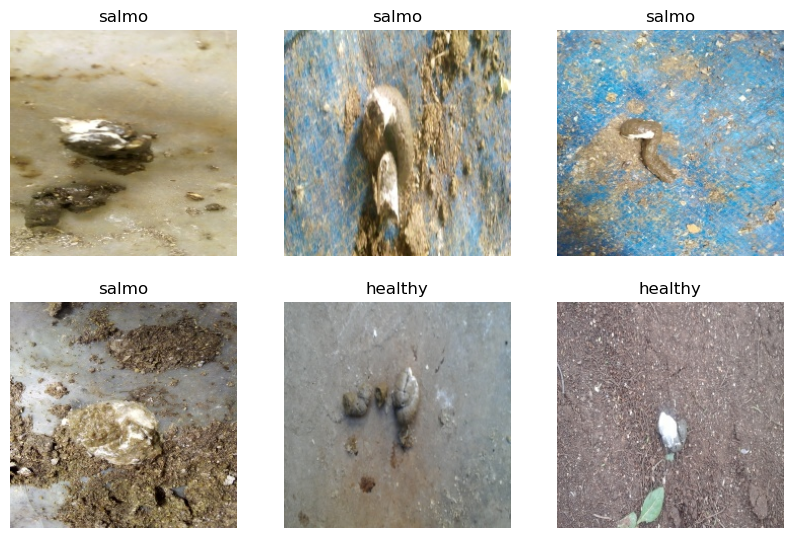

In [5]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [6]:
model=Sequential()



model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=3, activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2, padding="same"))


model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2, padding="same"))

model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2, padding="same"))

model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2, padding="same"))

model.add(BatchNormalization()) 
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))
model.summary()

/home/joston-saldanha/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
callback = [
    ModelCheckpoint(
        filepath="../poultrydata/chicken.keras",
        save_best_only=True,
        monitor="val_loss")]

In [9]:
history=model.fit(train_ds,epochs=20,callbacks=callback,validation_data=valid_ds)

Epoch 1/20


I0000 00:00:1722094904.717824   32102 service.cc:145] XLA service 0x705ff0003370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722094904.718082   32102 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-07-27 21:11:44.781864: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-27 21:11:45.118046: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/213 ━━━━━━━━━━━━━━━━━━━━ 1:09:06 20s/step - accuracy: 0.3125 - loss: 1.2940

I0000 00:00:1722094921.195547   32102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7210 - loss: 0.9214

I0000 00:00:1722094949.032394   33036 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_187', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1722094950.208364   33072 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_187', 8 bytes spill stores, 8 bytes spill loads



213/213 ━━━━━━━━━━━━━━━━━━━━ 50s 145ms/step - accuracy: 0.7213 - loss: 0.9204 - val_accuracy: 0.8263 - val_loss: 0.4406
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8427 - loss: 0.4594 - val_accuracy: 0.9334 - val_loss: 0.2136
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8594 - loss: 0.4229 - val_accuracy: 0.9450 - val_loss: 0.1371
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8901 - loss: 0.3411 - val_accuracy: 0.9551 - val_loss: 0.1273
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8909 - loss: 0.3181 - val_accuracy: 0.9696 - val_loss: 0.0863
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8938 - loss: 0.2995 - val_accuracy: 0.9653 - val_loss: 0.0865
Epoch 7/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9067 - loss: 0.2545 - val_accuracy: 0.9378 - val_loss: 0.1212
Epoch 8/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9145 - loss: 0.2552 - val_accura

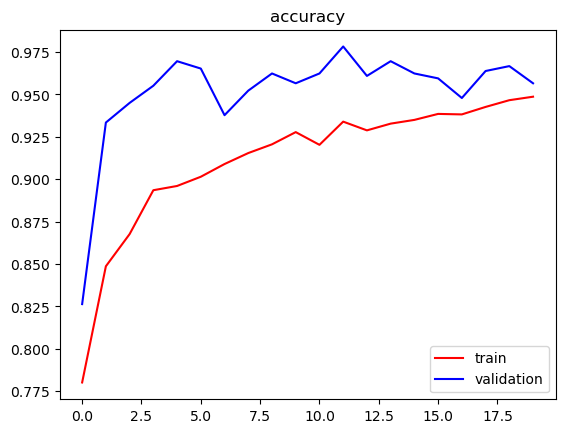

In [12]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title(label='accuracy')
plt.legend()
plt.show()

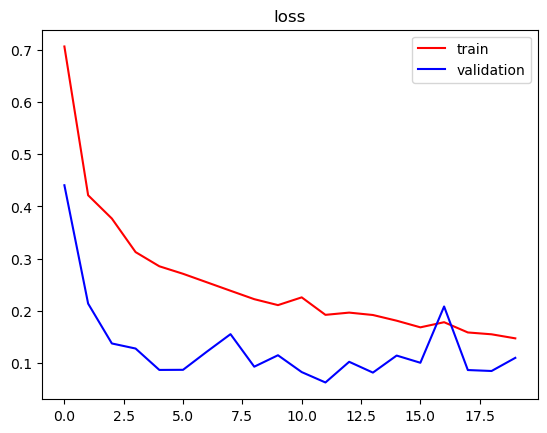

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title(label='loss')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model  
import numpy as np

model=load_model('../chicken.keras')

def results(filepath, class_names, model):
  
    img = load_img(filepath, target_size=(224, 224))
    img_array = np.expand_dims(img_to_array(img), axis=0)
    
    # Predict the class
    predictions = model.predict(img_array)
    pred_idx = np.argmax(predictions)
    pred_class = class_names[pred_idx]
    pred_confidence = np.max(predictions)
    
    # Display the image with prediction
    plt.imshow(img)
    plt.title(f"Class: {pred_class}, Confidence: {pred_confidence:.2f}")
    plt.show()

In [19]:
from tensorflow.keras.utils import image_dataset_from_directory
test_dataset = image_dataset_from_directory(
   "../poultrydata/test",
    image_size=(224, 224),
    batch_size=32)
classnames=test_dataset.class_names


Found 15 files belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


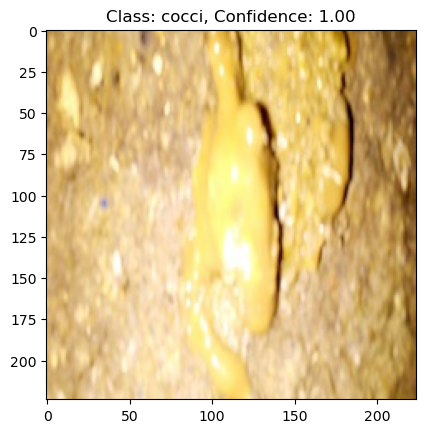

In [20]:
results('../poultrydata/test/cocci/cocci.1905.jpg',classnames,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


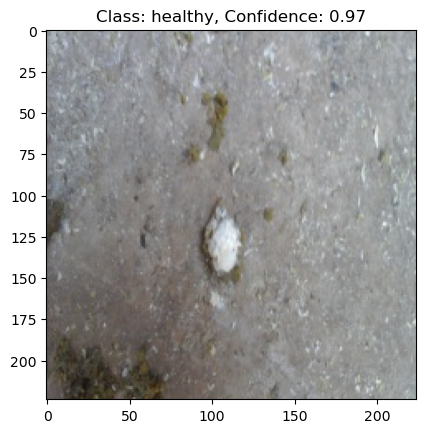

In [21]:
results('../poultrydata/test/healthy/healthy.1905.jpg',classnames,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


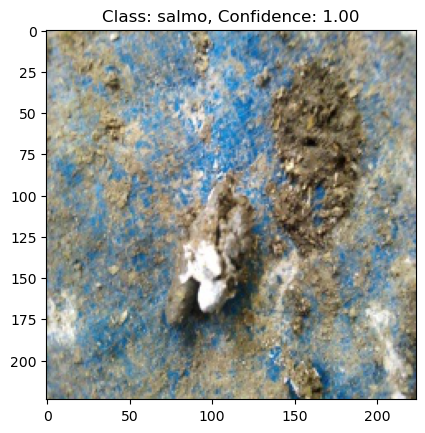

In [22]:
results('../poultrydata/test/salmo/salmo.1921.jpg',classnames,model)
